# 3.6 進階動畫 (Animation)

In [5]:
%matplotlib nbagg

## 單擺運動

<IPython.core.display.Javascript object>


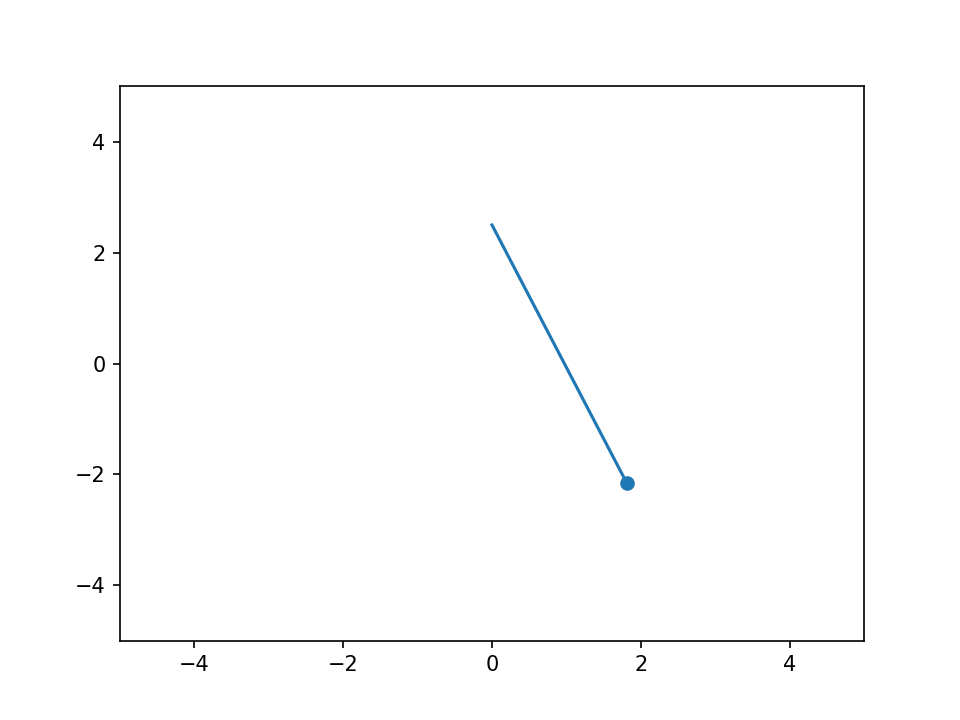

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

"""
 1. 參數設定, 設定變數及初始值
"""
m = 1               # 小球質量
size = 0.2          # 小球半徑
L = 5               # 擺長
theta0 = 30*np.pi/180 # 起始擺角, 用 radians 將單位換成 rad
theta = theta0      # 擺角
g = 9.8             # 重力加速度
T = 2*np.pi*np.sqrt(L/g)  # 單擺週期理論值, L=5, g=9.8, T=4.48798950512828
alpha = 0           # 角加速度, 初始值為 0
omega = 0           # 角速度, 初始值為 0
i = 0               # 小球經過週期次數
t = 0               # 時間
dt = 0.01          # 時間間隔

"""
 3. 物體運動部分
"""

ballpos = np.array([L*np.sin(theta0), L/2 - L*np.cos(theta0), 0])

omega_p = omega
fig, ax = plt.subplots()
scat = ax.scatter(ballpos[0], ballpos[1],marker='o')

line, = ax.plot([],[])
ax.axis([-L,L,-L,L])

def animate(i):    
    global ballpos, omega, alpha, theta
    # 計算小球所受力矩、角加速度、角速度、擺角
    r = ballpos - np.array([0, L/2, 0])
    F = np.array([0, -m*g, 0])
    torque = np.cross(r, F)
    #alpha = torque[2]/(m*L*L) #torque.z/(m*L*L)
    
    alpha = -m*g*ballpos[0]/(m*L*L)
    omega += alpha*dt
    theta += omega*dt
    
    # 更新小球的位置、速度, 繩子的軸方向及長度
    ballpos = np.array([L*np.sin(theta), L/2 - L*np.cos(theta), 0])    
    scat.set_offsets(ballpos[0:2])
    ropex = np.array([0, ballpos[0]])
    ropey = np.array([L/2,ballpos[1]])
    line.set_data(ropex,ropey)
    v = L*omega
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    return scat

anim = animation.FuncAnimation(fig, animate, frames=100, interval=10)
plt.show()

## 行星運動

<IPython.core.display.Javascript object>


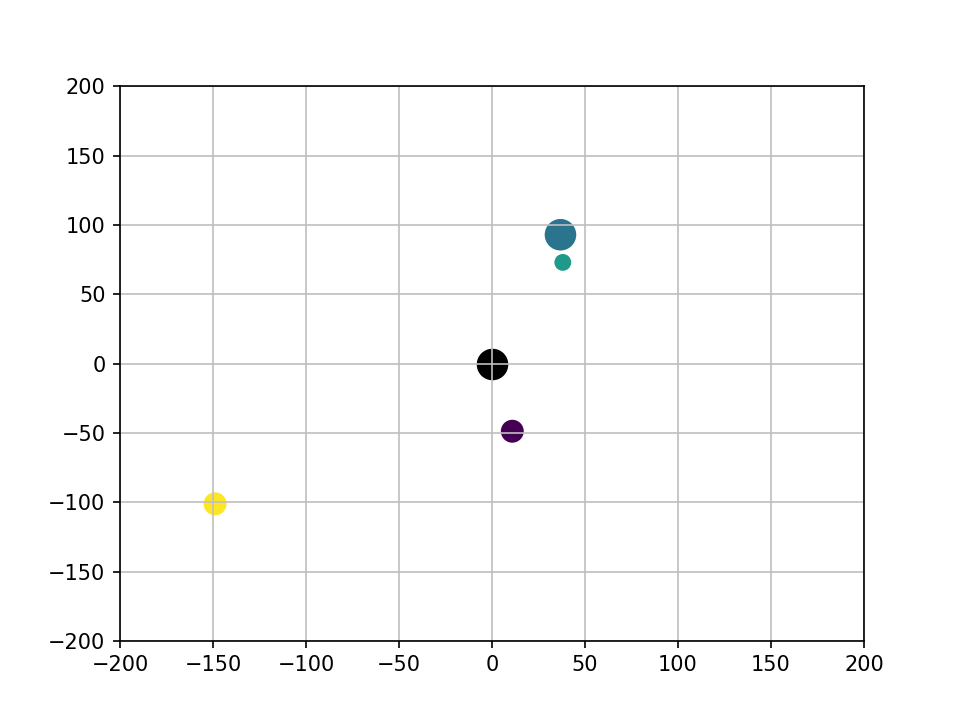

In [8]:
# -*- coding: utf-8 -*-
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def _update_plot(i, fig, scat):
    
    x = np.cos(omega*i)*amplitude
    y = np.sin(omega*i)*amplitude
    moonx = x[1] + np.cos(2*np.pi*0.04*i)*20
    moony = y[1] + np.sin(2*np.pi*0.04*i)*20
    scat.set_offsets(([x[0], y[0]],[x[1], y[1]],[x[2], y[2]],[moonx,moony]))
    return scat,

fig,ax  =  plt.subplots()    

f = np.array([0.015, 0.01, 0.005, 0.01])
omega = 2*np.pi*f
amplitude = np.array([50,100,180,10])
x = np.cos(omega*0)*amplitude
y = np.sin(omega*0)*amplitude
moonx = x[1] + 20*np.cos(2*np.pi*0.04*0)
moony = y[1] + 20*np.sin(2*np.pi*0.04*0)
x[3]=moonx
y[3]=moony
ax.grid(True, linestyle = '-', color = '0.75')
ax.set_xlim([-200, 200])
ax.set_ylim([-200, 200])
scat = plt.scatter(x, y,c = x, s=[100,200,100,50])
plt.scatter(0,0,c='k',s=200)
#scat.set_alpha(0.8)

anim = animation.FuncAnimation(fig, _update_plot, fargs = (fig, scat),
                               frames = 360, interval = 100)
              
plt.show()

## 多功能示範

<IPython.core.display.Javascript object>


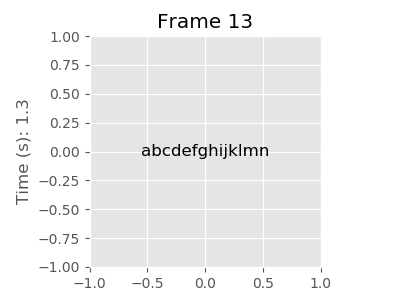

In [3]:
# Example animations using matplotlib's FuncAnimation
# Ken Hughes. 18 June 2016.

# For more detail, see
# https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

# Examples include
#    - line plot
#    - pcolor plot
#    - scatter plot
#    - contour plot
#    - quiver plot
#    - plot with changing labels

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Use matplotlib ggplot stylesheet if available
try:
    plt.style.use('ggplot')
except:
    pass

# Set which type of animation will be plotted. One of:
# line, pcolor, scatter, contour, quiver, labels
animation_type = 'labels'

# ----------------------------------------------------------------------------
# Create data to plot. F is 2D array. G is 3D array

# Create a two-dimensional array of data: F(x, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
X2, T2 = np.meshgrid(x, t)
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

# Create three-dimensional array of data G(x, z, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

# ----------------------------------------------------------------------------
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 3))

if animation_type not in ['line', 'scatter']:
    ax.set_aspect('equal')


# ----------------------------------------------------------------------------
if animation_type == 'line':
    ax.set(xlim=(-3, 3), ylim=(-1, 1))

    line = ax.plot(x, F[0, :], color='k', lw=2)[0]

    def animate(i):
        line.set_ydata(F[i, :])

# ----------------------------------------------------------------------------
if animation_type == 'pcolor':
    cax = ax.pcolormesh(x, y, G[:-1, :-1, 0], vmin=-1, vmax=1, cmap='Blues')
    fig.colorbar(cax)

    def animate(i):
        cax.set_array(G[:-1, :-1, i].flatten())

# ----------------------------------------------------------------------------
if animation_type == 'scatter':
    ax.set(xlim=(-3, 3), ylim=(-1, 1))
    scat = ax.scatter(x[::3], F[0, ::3])

    def animate(i):
        # Must pass scat.set_offsets an N x 2 array
        y_i = F[i, ::3]
        scat.set_offsets(np.c_[x[::3], y_i])

# ----------------------------------------------------------------------------
if animation_type == 'contour':
    # Keyword options used in every call to contour
    contour_opts = {'levels': np.linspace(-9, 9, 10), 'cmap':'RdBu', 'lw': 2}
    cax = ax.contour(x, y, G[..., 0], **contour_opts)

    def animate(i):
        ax.collections = []
        ax.contour(x, y, G[..., i], **contour_opts)

# ----------------------------------------------------------------------------
if animation_type == 'quiver':
    ax.set(xlim=(-4, 4), ylim=(-4, 4))

    # Plot every 20th arrow
    step = 15
    x_q, y_q = x[::step], y[::step]

    # Create U and V vectors to plot
    U = G[::step, ::step, :-1].copy()
    V = np.roll(U, shift=4, axis=2)

    qax = ax.quiver(x_q, y_q, U[..., 0], V[..., 0], scale=100)

    def animate(i):
        qax.set_UVC(U[..., i], V[..., i])

# ----------------------------------------------------------------------------
if animation_type == 'labels':
    ax.set(xlim=(-1, 1), ylim=(-1, 1))
    string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
    label = ax.text(0, 0, string_to_type[0],
                    ha='center', va='center',
                    fontsize=12)

    def animate(i):
        label.set_text(string_to_type[:i+1])
        ax.set_ylabel('Time (s): ' + str(i/10))
        ax.set_title('Frame ' + str(i))

# ----------------------------------------------------------------------------
# Save the animation
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)
fig.show()
# anim.save(animation_type + '.gif', writer='imagemagick')

## 雨滴模擬

<IPython.core.display.Javascript object>


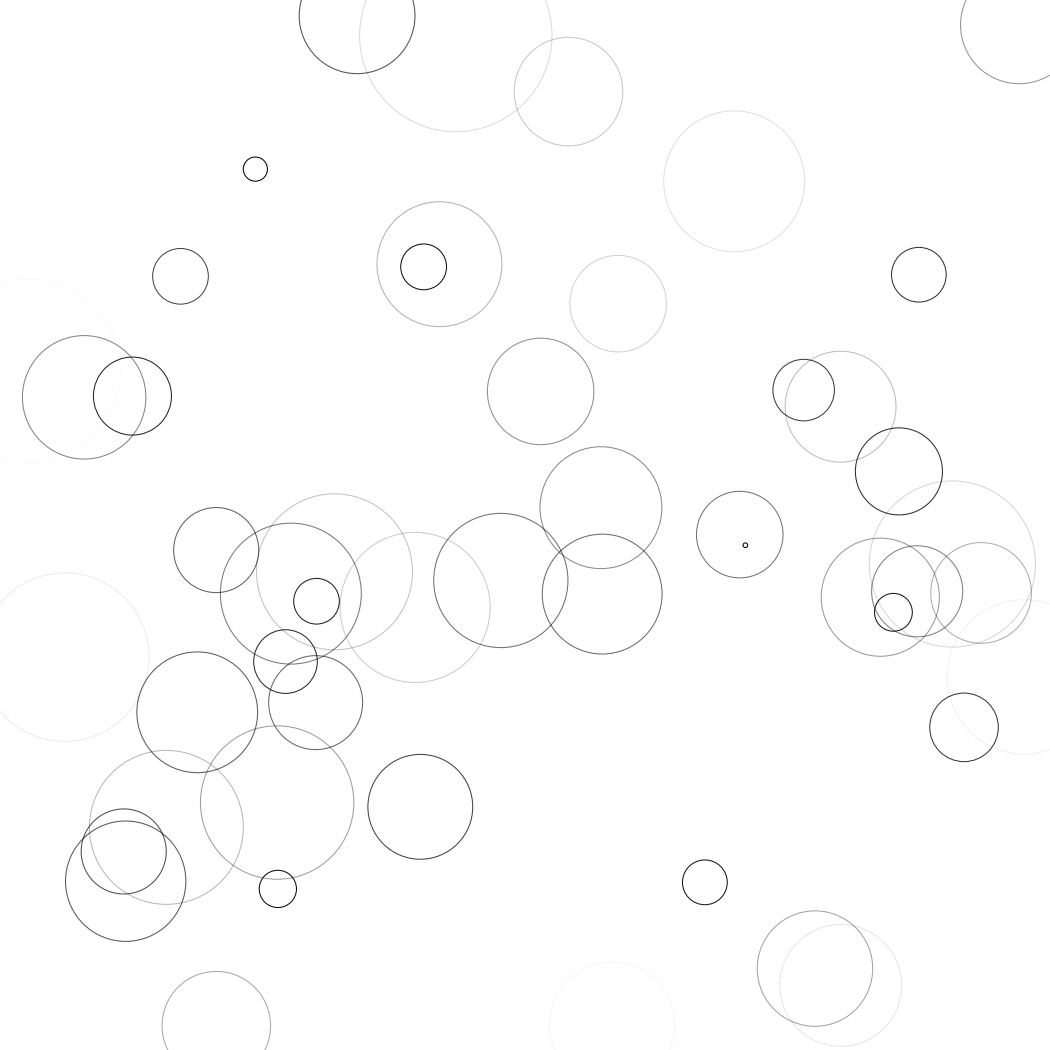

In [11]:
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()


## 粒子碰撞

<IPython.core.display.Javascript object>


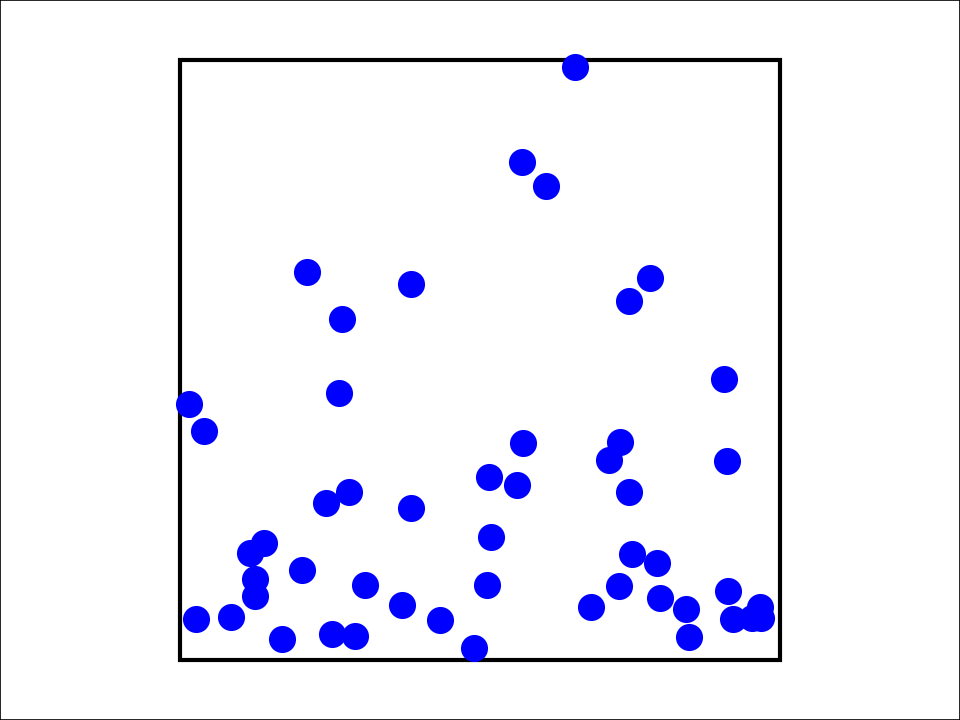

In [12]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()


## 雙擺運動

<IPython.core.display.Javascript object>


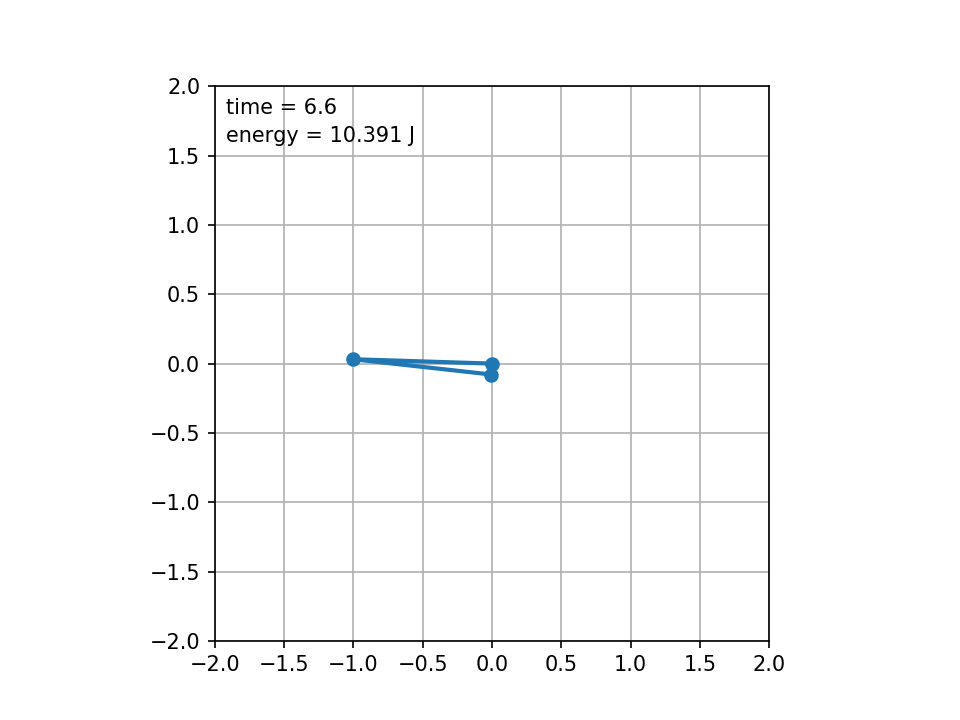

In [13]:
"""
General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.

adapted from code at http://matplotlib.sourceforge.net/examples/animation/double_pendulum_animated.py

Double pendulum formula translated from the C code at
http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class DoublePendulum:
    """Double Pendulum Class

    init_state is [theta1, omega1, theta2, omega2] in degrees,
    where theta1, omega1 is the angular position and velocity of the first
    pendulum arm, and theta2, omega2 is that of the second pendulum arm
    """
    def __init__(self,
                 init_state = [120, 0, -20, 0],
                 L1=1.0,  # length of pendulum 1 in m
                 L2=1.0,  # length of pendulum 2 in m
                 M1=1.0,  # mass of pendulum 1 in kg
                 M2=1.0,  # mass of pendulum 2 in kg
                 G=9.8,  # acceleration due to gravity, in m/s^2
                 origin=(0, 0)): 
        self.init_state = np.asarray(init_state, dtype='float')
        self.params = (L1, L2, M1, M2, G)
        self.origin = origin
        self.time_elapsed = 0

        self.state = self.init_state * np.pi / 180.
    
    def position(self):
        """compute the current x,y positions of the pendulum arms"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([self.origin[0],
                       L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([self.origin[1],
                       -L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        return (x, y)

    def energy(self):
        """compute the energy of the current state"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([-L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        vx = np.cumsum([L1 * self.state[1] * cos(self.state[0]),
                        L2 * self.state[3] * cos(self.state[2])])
        vy = np.cumsum([L1 * self.state[1] * sin(self.state[0]),
                        L2 * self.state[3] * sin(self.state[2])])

        U = G * (M1 * y[0] + M2 * y[1])
        K = 0.5 * (M1 * np.dot(vx, vx) + M2 * np.dot(vy, vy))

        return U + K

    def dstate_dt(self, state, t):
        """compute the derivative of the given state"""
        (M1, M2, L1, L2, G) = self.params

        dydx = np.zeros_like(state)
        dydx[0] = state[1]
        dydx[2] = state[3]

        cos_delta = cos(state[2] - state[0])
        sin_delta = sin(state[2] - state[0])

        den1 = (M1 + M2) * L1 - M2 * L1 * cos_delta * cos_delta
        dydx[1] = (M2 * L1 * state[1] * state[1] * sin_delta * cos_delta
                   + M2 * G * sin(state[2]) * cos_delta
                   + M2 * L2 * state[3] * state[3] * sin_delta
                   - (M1 + M2) * G * sin(state[0])) / den1

        den2 = (L2 / L1) * den1
        dydx[3] = (-M2 * L2 * state[3] * state[3] * sin_delta * cos_delta
                   + (M1 + M2) * G * sin(state[0]) * cos_delta
                   - (M1 + M2) * L1 * state[1] * state[1] * sin_delta
                   - (M1 + M2) * G * sin(state[2])) / den2
        
        return dydx

    def step(self, dt):
        """execute one time step of length dt and update state"""
        self.state = integrate.odeint(self.dstate_dt, self.state, [0, dt])[1]
        self.time_elapsed += dt

#------------------------------------------------------------
# set up initial state and global variables
pendulum = DoublePendulum([180., 0.0, -20., 0.0])
dt = 1./30 # 30 fps

#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')
    return line, time_text, energy_text

def animate(i):
    """perform animation step"""
    global pendulum, dt
    pendulum.step(dt)
    
    line.set_data(*pendulum.position())
    time_text.set_text('time = %.1f' % pendulum.time_elapsed)
    energy_text.set_text('energy = %.3f J' % pendulum.energy())
    return line, time_text, energy_text

# choose the interval based on dt and the time to animate one step
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval, blit=True, init_func=init)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
